In [1]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

## pre-processing waterbase dataset
includes data about many rivers throughout Europe

In [2]:
os.chdir("C:\\Users\\Hannah Russell\\north_sea_estuaries_visualisations\\")
cwd = os.path.abspath(os.curdir)

waterbase_sites = pd.read_csv(cwd + '/data/input/mixed/df_1/Waterbase_v2021_1_S_WISE6_SpatialObject_DerivedData.csv')
waterbase_agg = pd.read_csv(cwd + '/data/input/mixed/df_1/Waterbase_v2021_1_T_WISE6_AggregatedData.csv')
#waterbase_agg_by_wat = pd.read_csv('Waterbase_v2021_1_T_WISE6_AggregatedDataByWaterBody.csv')

#waterbase_agg
waterbase_sites.head()

C:\Users\Hannah Russell\AppData\Local\Temp\ipykernel_10596\2277352076.py:5: DtypeWarning: Columns (21,23,24,29) have mixed types. Specify dtype option on import or set low_memory=False.
  waterbase_agg = pd.read_csv(cwd + '/data/input/mixed/df_1/Waterbase_v2021_1_T_WISE6_AggregatedData.csv')


countryCode thematicIdIdentifier thematicIdIdentifierScheme  \
0          AL             ALGW_011  eionetGroundWaterBodyCode   
1          AL             ALGW_021  eionetGroundWaterBodyCode   
2          AL             ALGW_022  eionetGroundWaterBodyCode   
3          AL             ALGW_031  eionetGroundWaterBodyCode   
4          AL             ALGW_034  eionetGroundWaterBodyCode   

  monitoringSiteIdentifier monitoringSiteIdentifierScheme monitoringSiteName  \
0                      NaN                            NaN                NaN   
1                      NaN                            NaN                NaN   
2                      NaN                            NaN                NaN   
3                      NaN                            NaN                NaN   
4                      NaN                            NaN                NaN   

  waterBodyIdentifier  waterBodyIdentifierScheme      waterBodyName  \
0            ALGW_011  eionetGroundWaterBodyCode          1 -DOBRAC   
1            ALGW_021  eionetGroundWaterBodyCode     50 BARBULLONJE   
2            ALGW_022  eionetGroundWaterBodyCode      26 FUSHE KUQE   
3            ALGW_031  eionetGroundWaterBodyCode  5 KRASTE -ELBASAN   
4            ALGW_034  eionetGroundWaterBodyCode        17 A VIDHAS   

  specialisedZoneType  ... surfaceWaterBodyTypeCode subUnitIdentifier  \
0     groundWaterBody  ...                      NaN               NaN   
1     groundWaterBody  ...                      NaN               NaN   
2     groundWaterBody  ...                      NaN               NaN   
3     groundWaterBody  ...                      NaN               NaN   
4     groundWaterBody  ...                      NaN               NaN   

  subUnitIdentifierScheme subUnitName rbdIdentifier rbdIdentifierScheme  \
0                     NaN         NaN           NaN                 NaN   
1                     NaN         NaN           NaN                 NaN   
2                     NaN         NaN           NaN                 NaN   
3                     NaN         NaN           NaN                 NaN   
4                     NaN         NaN           NaN                 NaN   

  rbdName confidentialityStatus lat lon  
0     NaN          inapplicable NaN NaN  
1     NaN          inapplicable NaN NaN  
2     NaN          inapplicable NaN NaN  
3     NaN          inapplicable NaN NaN  
4     NaN          inapplicable NaN NaN  

[5 rows x 22 columns]

In [3]:
waterbase_sites_coord = waterbase_sites[['monitoringSiteIdentifier', 'lat', 'lon']] #these are the relevant columns
waterbase_sites_coord.dropna(inplace = True)
waterbase_sites_coord.head()

C:\Users\Hannah Russell\AppData\Local\Temp\ipykernel_10596\1899205715.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  waterbase_sites_coord.dropna(inplace = True)


monitoringSiteIdentifier      lat      lon
10                    AL011  41.6856  20.3489
11                    AL013  42.0420  19.4910
12                    AL014  42.0990  19.5530
13                    AL015  42.0540  19.5290
14                    AL017  41.3500  19.4000

In [4]:
# Merge coordinates with df
#waterbase_agg.observedPropertyDeterminandLabel.unique()
waterbase_coord = waterbase_agg.merge(waterbase_sites_coord, how = 'left', left_on = 'monitoringSiteIdentifier', right_on = 'monitoringSiteIdentifier')

# separate df for 
chlor = waterbase_coord[waterbase_coord['observedPropertyDeterminandLabel'].str.contains('Chlorophyll a') == True]
#chlor

turbidity = waterbase_coord[waterbase_coord['observedPropertyDeterminandLabel'].str.contains('Turbidity') == True]
#turbidity

In [5]:
# All Elbe sites 250+ km upstream
Elbe_sites = waterbase_sites[waterbase_sites['waterBodyName'].str.contains('elbe ', case = False) == True]
Elbe_sites = Elbe_sites[Elbe_sites['countryCode'].str.contains('DE') == True]
Elbe_sites = Elbe_sites[['monitoringSiteIdentifier', 'lat', 'lon']]
#Elbe_sites

# Before Rotterdam, the Nieuwe Maas is made up of a bunch of different rivers, so I included the tributaries here
Maas_and_tributaries_sites = waterbase_sites[waterbase_sites['waterBodyName'].str.contains('maas|ijssel|lek|noord|schie|dordtsche kil', case = False) == True]
Maas_and_tributaries_sites = Maas_and_tributaries_sites[Maas_and_tributaries_sites['countryCode'].str.contains('NL') == True]
Maas_and_tributaries_sites = Maas_and_tributaries_sites[['monitoringSiteIdentifier', 'lat', 'lon']]
Maas_and_tributaries_sites_list = Maas_and_tributaries_sites['monitoringSiteIdentifier'].dropna().values.tolist()


Ems_sites = waterbase_sites[waterbase_sites['waterBodyName'].str.contains('ems ', case = False) == True]
Ems_sites = Ems_sites[['monitoringSiteIdentifier', 'lat', 'lon']]
Ems_sites_list = Ems_sites['monitoringSiteIdentifier'].dropna().values.tolist()
#Ems_sites

In [6]:
Schelde_sites = waterbase_sites[waterbase_sites['waterBodyName'].str.contains('scheld', case = False) == True]
Schelde_sites = Schelde_sites[['monitoringSiteIdentifier', 'lat', 'lon']]
Schelde_sites = Schelde_sites.dropna()
Schelde_sites_list = Schelde_sites['monitoringSiteIdentifier'].values.tolist()
#Schelde_sites

Schelde_sites_km_from_North_Sea = ['54.5', '86.5', '116.8', '147.6', '162.5', '178.9', '183.8', '212', 'Bosbeek', 'Zeekanal', '86.8', '170.3', '62.7', '211', 'binnenschelde', '55.2', '0.5', 'Eastern Schelde']

Schelde_sites['km_from_sea'] = Schelde_sites_km_from_North_Sea
Schelde_sites

monitoringSiteIdentifier       lat      lon      km_from_sea
3881           BEVL_VMM_154100  51.35300  4.24068             54.5
3882           BEVL_VMM_162000  51.14311  4.33057             86.5
3883           BEVL_VMM_164000  51.04082  4.12334            116.8
3884           BEVL_VMM_168900  51.00578  3.80358            147.6
3885           BEVL_VMM_172100  51.00160  3.72403            162.5
3886           BEVL_VMM_173000  50.89344  3.68000            178.9
3887           BEVL_VMM_174000  50.87044  3.62801            183.8
3888           BEVL_VMM_179000  50.70959  3.36074              212
3908           BEVL_VMM_351000  51.06586  4.36510          Bosbeek
3961          BEVL_VMM_C05-181  51.02646  4.35861         Zeekanal
3965           BEVL_VMM_C05-42  51.14007  4.32743             86.8
3966           BEVL_VMM_C05-58  50.95630  3.65863            170.3
3977           BEVL_VMM_C08-43  51.29667  4.29795             62.7
3979           BEVL_VMM_C08-55  50.71769  3.36461              211
49218              NL25_830002  51.48858  4.26269    binnenschelde
49531         NL89_SCHAARVODDL  51.35029  4.25066             55.2
49536        NL89_VLISSGBISSVH  51.41199  3.56562              0.5
49537             NL89_WISSKKE  51.60158  3.72057  Eastern Schelde

Text(0, 0.5, 'Chlorophyll ug/L')

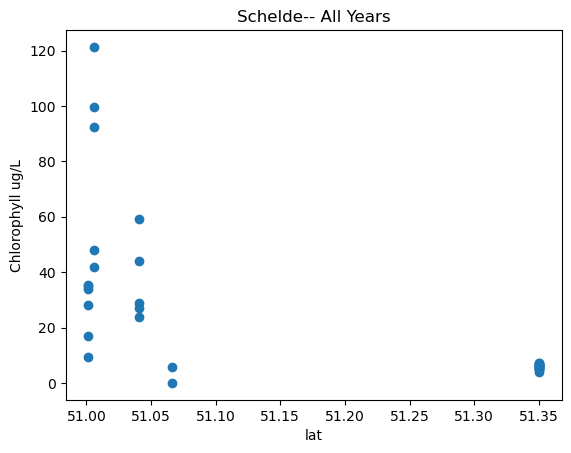

In [7]:
# Plot Schelde chlorophyll values
Schelde_chlor = chlor[chlor['monitoringSiteIdentifier'].str.contains("|".join(Schelde_sites_list))]
#Schelde_chlor

sch_lat = Schelde_chlor['lat']
sch_value = Schelde_chlor['resultMeanValue']

# plot of all cholorphyll values from all years on one plot
plt.scatter(sch_lat, sch_value)
plt.title('Schelde-- All Years')
plt.xlabel('lat')
plt.ylabel('Chlorophyll ug/L')

In [8]:
# Plot Schelde turbidity values (apparently there are none)
Schelde_turb = turbidity[turbidity['monitoringSiteIdentifier'].str.contains("|".join(Schelde_sites_list))]
Schelde_turb

sch_t_lat = Schelde_turb['lat']
sch_t_value = Schelde_turb['resultMeanValue']

# plot of all turbidity values from all years on one plot
plt.scatter(sch_t_lat, sch_t_value)
plt.title('Schelde-- All Years')
plt.xlabel('lat')
plt.ylabel('Turbidity')

Text(0, 0.5, 'Turbidity')

C:\Users\Hannah Russell\AppData\Local\Temp\ipykernel_10596\1155521294.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Schelde_c_avg = Schelde_chlor.groupby('monitoringSiteIdentifier').median()


Text(0, 0.5, 'Chlorophyll ug/L')

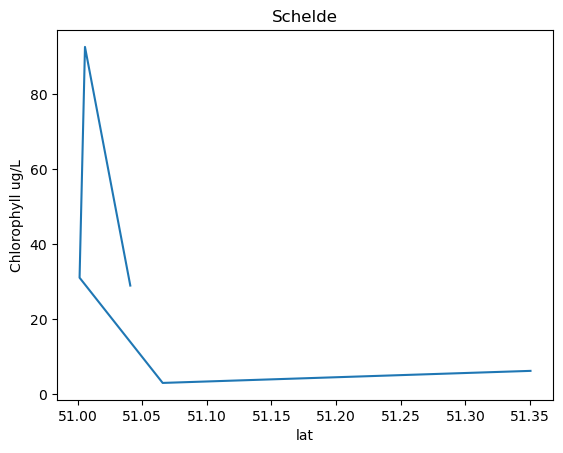

In [9]:
Schelde_c_avg = Schelde_chlor.groupby('monitoringSiteIdentifier').median()
Schelde_c_avg
# NL89_SCHAARVODDL is 55.43 km from the Sea

# Chlorophyll values from all years
lat_a = Schelde_c_avg['lat']
Schelde_chlor_a = Schelde_c_avg['resultMeanValue']
plt.plot(lat_a, Schelde_chlor_a)
plt.title('Schelde')
plt.xlabel('lat')
plt.ylabel('Chlorophyll ug/L')

In [11]:
# extract Maas sites from chlor
Maas_chlor = chlor[chlor['monitoringSiteIdentifier'].str.contains("|".join(Maas_and_tributaries_sites_list))]
Maas_chlor

Maas_avg = Maas_chlor.groupby('monitoringSiteIdentifier').median()
Maas_avg
# NL89_SCHAARVODDL is 55.43 km from the Sea

maas_lat = Maas_chlor['lat']
maas_value = Maas_chlor['resultMeanValue']

# plot of all cholorphyll values from all years on one plot
plt.scatter(maas_lat, maas_value)
plt.title('Maas-- All Years')
plt.xlabel('lat')
plt.ylabel('Chlorophyll ug/L')

C:\Users\Hannah Russell\AppData\Local\Temp\ipykernel_10596\1869121405.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Maas_avg = Maas_chlor.groupby('monitoringSiteIdentifier').median()


Text(0, 0.5, 'Chlorophyll ug/L')

In [ ]:
Maas_c_avg = Maas_chlor.groupby('monitoringSiteIdentifier').median()
Maas_c_avg

# Chlorophyll values from all years
Maas_lat_a = Maas_c_avg['lat']
Maas_chlor_a = Maas_c_avg['resultMeanValue']
plt.plot(Maas_lat_a, Maas_chlor_a)
plt.title('Maas')
plt.xlabel('lat')
plt.ylabel('Chlorophyll ug/L')

In [ ]:
pd.set_option('display.max_rows', None)
Maas_and_tributaries_sites

In [ ]:
# extract Ems sites from chlor
Ems_chlor = chlor_cd[chlor_cd['monitoringSiteIdentifier'].str.contains("|".join(Ems_sites_list))]
Ems_chlor